In [2]:
!pip install scikit-image
!pip install sklearn
!pip install scipy
!pip install hdbscan
!pip install seaborn

You should consider upgrading via the '/Users/trevorchan/environments/virtual-window/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/trevorchan/environments/virtual-window/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/trevorchan/environments/virtual-window/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/trevorchan/environments/virtual-window/bin/python3 -m pip install --upgrade pip' command.
     |████████████████████████████████| 215 kB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 10.0 MB 16.5 MB/s eta 0:00:01    |█▊                              | 542 kB 16.5 MB/s eta 0:00:01     |██████████████████████████████▊ | 9.6 MB 16.5 MB/s eta 0:00:01
     |████████████████████████████████| 510 kB 30.4 MB/s eta 0:00:01
You should consider upgrading via the '/Users/trevorchan/environments/virtual-window/bin/python3 -m pip install --

In [3]:
import sys
import math
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import seaborn as sns

from PIL import Image
from skimage.draw import ellipse
from skimage.measure import label, regionprops, find_contours, approximate_polygon
from skimage.transform import rotate
from sklearn.neighbors import KDTree
from scipy.spatial import distance

from sklearn.cluster import DBSCAN
import hdbscan

### Uses numpy, skimage, pillow

In [4]:
class cell_poly:
    #centroid as a 1x2 tuple (x,y)
    #polygon as a list of 1x2 tuples (x,y)
    def __init__(self, centroid, polygon):
        self.centroid = centroid
        self.polygon = polygon

In [5]:
def cell_poly_properties(img):
    #takes in an array of a binary mask
    #finds all cell centroids and polygonal borders in a given mask
    #returns a cell array of user defined objects
    
    
    img = np.invert(img)
    img = label(img)
    regions = regionprops(img)
    
    # SUGGESTED
    #boundary = [approximate_polygon (contour, tolerance=1) for contour in 
    #            find_contours(img, 1, fully_connected='high')]
    '''
    boundary = []
    for i,contour in enumerate(find_contours(img, 0)):
        boundary[i] = approximate_polygon(contour, tolerance = 1)
    '''
    
    # SUGGESTED
    #print(len(boundary))
    print(len(regions))
    #cell_poly_list = [cell_poly (regions[i].centroid, boundary[i]) for i in range (0, len(boundary))]
    cell_poly_list = [cell_poly (regions[i].centroid, regions[i].centroid) for i in range (0, len(regions))]
    '''
    cell_poly_list = []
    for i,contour in enumerate(boundary):
        cell_poly_list[i] = cell_poly(regions[i].centroid, contour)
    '''
    return cell_poly_list

In [6]:
def make_adjacencies(clist, mindist):
    #takes a list of n cell_poly objects
    #takes a minimum distance defined as adjacent
    #returns an adjacency list of length n
    
    centroid_list = []
    adjacency_list = []
    wide_list = []
    
    centroid_list = [cell.centroid for cell in clist]
    print(len(centroid_list))
    centroid_list = np.array(centroid_list)
    print(type(centroid_list))
    '''
    for i,cell in enumerate(clist):
        centroid_list[i] = cell.centroid
    '''
    tree = []
    tree = KDTree(centroid_list, leaf_size=10)
    
    wide_list = [tree.query_radius(center, mindist*10) for center in centroid_list]
    
    for i,small_list in enumerate(wide_list):
        adjacency_list.append (list())
        for index in small_list:
            # if we've already explored this pair then skip (as cdist _should_ be symmetrical)
            if index <= i:
                continue
            d = distance.cdist(clist[i].polygon,clist[index].polygon,'euclidean')
            if min(d) < mindist:
                adjacency_list[i].append (index)
    
    # TODO: correct all singly-matched pairs (which should be all of them)
    return adjacency_list

In [7]:
def HDB_cluster(centroids_list, min_size):
    clusterer = hdbscan.HDBSCAN(min_cluster_size=min_size)
    cluster_labels = clusterer.fit_predict(centroids_list)
    #hierarchy = clusterer.cluster_hierarchy_
    #alt_labels = hierarchy.get_clusters(0.100, 5)
    #hierarchy.plot()
    #return (cluster_labels,hierarchy,alt_labels)

    '''
    clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis', 
                                      edge_alpha=0.6, 
                                      node_size=80, 
                                      edge_linewidth=2)
    '''
    
    clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)
    plt.show()
    #plot_clusters(data, hdbscan.HDBSCAN, (), {'min_cluster_size':15})
    clusterer.condensed_tree_.plot()


    plt.show()

    palette = sns.color_palette()
    cluster_colors = [sns.desaturate(palette[col], sat) 
                      if col >= 0 else (0.5, 0.5, 0.5) for col, sat in 
                      zip(clusterer.labels_, clusterer.probabilities_)]
    xlist = [centroid[0] for centroid in centroids_list]
    ylist = [centroid[1] for centroid in centroids_list]

    ax = plt.gca()
    ax.invert_yaxis()
    plt.scatter(ylist, xlist, c=cluster_colors, alpha = .5)


    return (cluster_labels)
    
    

In [8]:
'''
def DB_cluster(centroids_list,min_size,epsilon):
  clustering = DBSCAN(eps=epsilon, min_samples=min_size).fit(centroids_list)
  #clustering.labels_
  palette = sns.color_palette()
  cluster_colors = [sns.desaturate(palette[col], sat) 
    if col >= 0 else (0.5, 0.5, 0.5) for col, sat in clustering.labels_]
  xlist = [centroid[0] for centroid in centroids_list]
  ylist = [centroid[1] for centroid in centroids_list]
'''

'\ndef DB_cluster(centroids_list,min_size,epsilon):\n  clustering = DBSCAN(eps=epsilon, min_samples=min_size).fit(centroids_list)\n  #clustering.labels_\n  palette = sns.color_palette()\n  cluster_colors = [sns.desaturate(palette[col], sat) \n    if col >= 0 else (0.5, 0.5, 0.5) for col, sat in clustering.labels_]\n  xlist = [centroid[0] for centroid in centroids_list]\n  ylist = [centroid[1] for centroid in centroids_list]\n'

In [12]:
#driver

'''
images[]
for image_path in glob.glob(sys.argv[1] + '/*.png'): #filepath of folder
    #print(image_path)
    img = Image.open(image_path)
    images.append(asarray(img))
'''
#read in a list of polygons and bounding boxes
#or (temporary) a binary image
image_path = 'HighConfluencyTrain3_InProgress.png'
img = np.array(Image.open(image_path))
clist = cell_poly_properties(img)
adj_list = make_adjacencies(clist, 10)


1498
1498
<class 'numpy.ndarray'>


ValueError: Expected 2D array, got 1D array instead:
array=[21.25738397 97.87341772].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [28]:
#Second test driver

image_path = 'HighConfluencyTrain3_InProgress.png'
img = np.array(Image.open(image_path))
clist = cell_poly_properties(img)
mindist = 20

centroid_list = []
adjacency_list = []
wide_list = []

#centroid_list = np.array([np.array(cell.centroid) for cell in clist])
centroid_list = [cell.centroid for cell in clist]
print(len(centroid_list))
centroid_list = np.array(centroid_list)
print(type(centroid_list))
'''
for i,cell in enumerate(clist):
    centroid_list[i] = cell.centroid
'''
tree = []
tree = KDTree(centroid_list, leaf_size=10)

#wide_list = [tree.query_radius(center, mindist*10) for center in centroid_list]
wide_list = tree.query_radius(centroid_list, mindist * 10)

for i,small_list in enumerate(wide_list):
    adjacency_list.append (list())
    for index in small_list:
        # if we've already explored this pair then skip (as cdist _should_ be symmetrical)
        if index <= i:
            continue
        d = distance.cdist(np.array(clist[i].polygon),np.array(clist[index].polygon),'euclidean')
        if min(d) < mindist:
            adjacency_list[i].append (index)

1498
1498
<class 'numpy.ndarray'>


ValueError: XA must be a 2-dimensional array.

In [41]:
#(np.array(clist[i].polygon))
print((clist[i].polygon[0:4]))

(21.257383966244724, 97.87341772151899)


In [35]:
import random
rng = np.random.RandomState(0)
X = rng.random_sample((10, 3))
print(X)



[[0.5488135  0.71518937 0.60276338]
 [0.54488318 0.4236548  0.64589411]
 [0.43758721 0.891773   0.96366276]
 [0.38344152 0.79172504 0.52889492]
 [0.56804456 0.92559664 0.07103606]
 [0.0871293  0.0202184  0.83261985]
 [0.77815675 0.87001215 0.97861834]
 [0.79915856 0.46147936 0.78052918]
 [0.11827443 0.63992102 0.14335329]
 [0.94466892 0.52184832 0.41466194]]


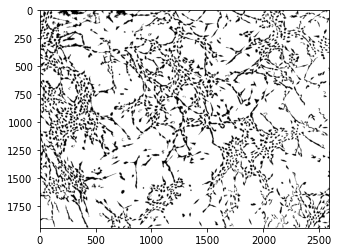

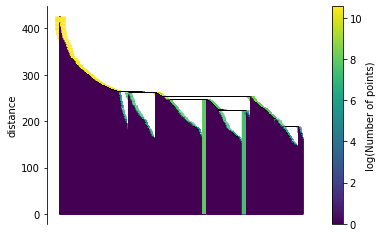

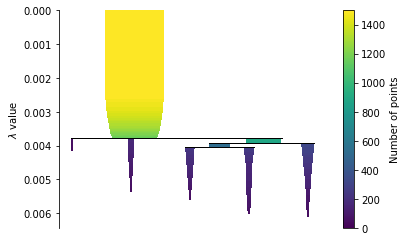

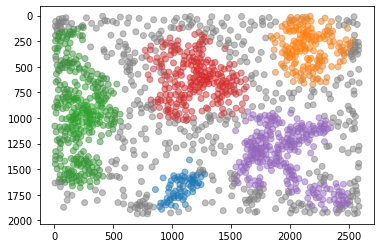

In [29]:

fig, ax = plt.subplots()
ax.imshow(img, cmap=plt.cm.gray)
plt.show()
centroids = []
centroids = [cell.centroid for cell in clist]
(cluster_labels) = HDB_cluster(centroids,50)

#DB_cluster(centroids, 50, 2)
plt.show()
#(cluster_labels,hierarchy,alt_labels) = HDB_cluster(centroids,50)

#ax.plot((x0, x1), (y0, y1), '-r', linewidth=1)



In [1]:
!git status

fatal: not a git repository (or any of the parent directories): .git
